## EDA Group 10

## Table of Contents
1. [Introduction](#Introduction)
2. [Description of the Data](#Description-of-the-Data)
3. [Discussion of Missing Data](#Discussion-of-Missing-Data)
4. [Exploratory Visualizations and/or Summary Tables](#Exploratory-Visualizations-and-Summary-Tables)
5. [Results](#Results)


## Introduction <a id="Introduction"></a>

Our goal for this project is to provide a solution to Swire Coca-Cola that enables them to reduce unplanned maintenance events and improve productivity. The target variable we are focusing on, at this point in the project, is whether an event is planned or unplanned. Once we gain a deeper understanding, we will develop a model that helps Swire Coca-Cola predict upcoming events and implement protocols to avoid unplanned maintenance.

The purpose of this notebook is to document the exploratory phase of the analytics process. In this initial analysis, we aim to better understand the relationships between variables, which will guide our model selection and address the objectives outlined in the business problem. During this EDA, we will also examine the structure of the data, identify outliers, and visualize our findings.

The first step is to examine the relationship between equipment ID and maintenance activity type to determine if certain components are more likely to fail unexpectedly. This will help guide our further analysis as we focus on specific equipment IDs with a higher likelihood of unplanned failures.

The second question we want to explore is whether older machines are more likely to experience unplanned maintenance. By analyzing the EQUIP_START_UP_DATE field, we can investigate if there is a correlation between a machine’s age and the frequency of unplanned maintenance events. Specifically, we aim to determine if older equipment tends to break down more often. If this is the case, implementing more frequent planned maintenance for older machines could reduce downtime and ultimately save the company money.  

Another question we aim to explore is whether certain plant IDs are more prone to unplanned maintenance activities. By analyzing this, we may be able to identify problem plants and tailor our model to address the issues of a specific plant, rather than making it broad enough to handle problems across all plants.

## Description of the Data <a id="Description-of-the-Data"></a>

The data provided for this project comes from Swire Coca-Cola's internal system, IWC, which tracks equipment breakdowns. The dataset contains maintenance records with key features such as plant ID, equipment ID, execution date, work duration, and type of maintenance. It is a large dataset with over 1.4 million records. The case description notes that the "actual working minutes" is the most reliable variable for determining the time spent on repairs, as the "actual start time" and "actual end time" can be inaccurate in certain situations.

## Discussion of Missing Data <a id="Discussion-of-Missing-Data"></a>

### Code for Understanding Missing Data

In [3]:
import pandas as pd
df = pd.read_csv('IWC_Work_Orders_Extract.csv', low_memory=False) #DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types
df.head()
df.info()
df.describe()

# Check for missing/dublicate values:

print("Missing values per column:")
print(df.isnull().sum())
print("\nNumber of duplicated rows:")
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427264 entries, 0 to 1427263
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ORDER_ID                         1427264 non-null  int64  
 1   PLANT_ID                         1427264 non-null  object 
 2   PRODUCTION_LOCATION              1427264 non-null  object 
 3   EXECUTION_START_DATE             1427264 non-null  object 
 4   EXECUTION_FINISH_DATE            1427264 non-null  object 
 5   ACTUAL_START_TIME                1427264 non-null  object 
 6   ACTUAL_FINISH_TIME               1427264 non-null  object 
 7   ACTUAL_WORK_IN_MINUTES           1427264 non-null  float64
 8   MAINTENANCE_PLAN                 152594 non-null   object 
 9   MAINTENANCE_ITEM                 152594 non-null   float64
 10  MAINTENANCE_ACTIVITY_TYPE        1427264 non-null  object 
 11  ORDER_DESCRIPTION                291767 non-null  

In [6]:
df_filtered = df[df['PLANT_ID'] == 'G261']
df_filtered.head()

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
6042,901724580,G261,SILVERSTONE,2023-03-01,2023-03-01,12:52:00.000,12:52:00.000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6043,207731527,G261,SILVERSTONE,2022-12-14,2022-12-14,13:04:00.000,17:30:00.000,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6045,200003228916,G261,SILVERSTONE,2022-08-05,2022-08-05,19:06:00.000,21:40:00.000,153.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6046,200000808319,G261,SILVERSTONE,2018-05-16,2018-05-16,18:11:00.000,19:01:00.000,50.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6053,401519840,G261,SILVERSTONE,2021-07-23,2021-07-23,13:01:00.000,16:50:00.000,422.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains significant missing data in several columns, particularly in MAINTENANCE_PLAN, MAINTENANCE_ITEM, ORDER_DESCRIPTION, and various FUNCTIONAL_AREA_NODE_* columns, with some having over 70% of their values missing. These columns may not be critical for the analysis and could be candidates for removal. In some cases though, the missing data is meaningful. For example, if MAINTENANCE_PLAN or EQUIP_VALID_FROM is missing, that might indicate that the equipment wasn’t in use or no maintenance plan was required. In these cases, leaving the missing data as NaN might be acceptable and even informative.However, for columns that are important, like ORDER_DESCRIPTION, filling missing values with placeholders such as "Unknown" or using statistical imputation methods like the mode or median may be more appropriate.

Additionally, since there are no duplicated rows, the data is clean in that respect. Moving forward, it’s essential that we decide as a team which columns to retain based on their relevance and to document any imputation or data-dropping decisions. This will ensure that the dataset is prepared for modeling while maintaining transparency in handling missing data.

## Exploratory Visualizations and/or Summary Tables <a id="Exploratory-Visualizations-and-Summary-Tables"></a>


## Question 1
### Examine the relationship between equipment ID and maintenance activity type. 

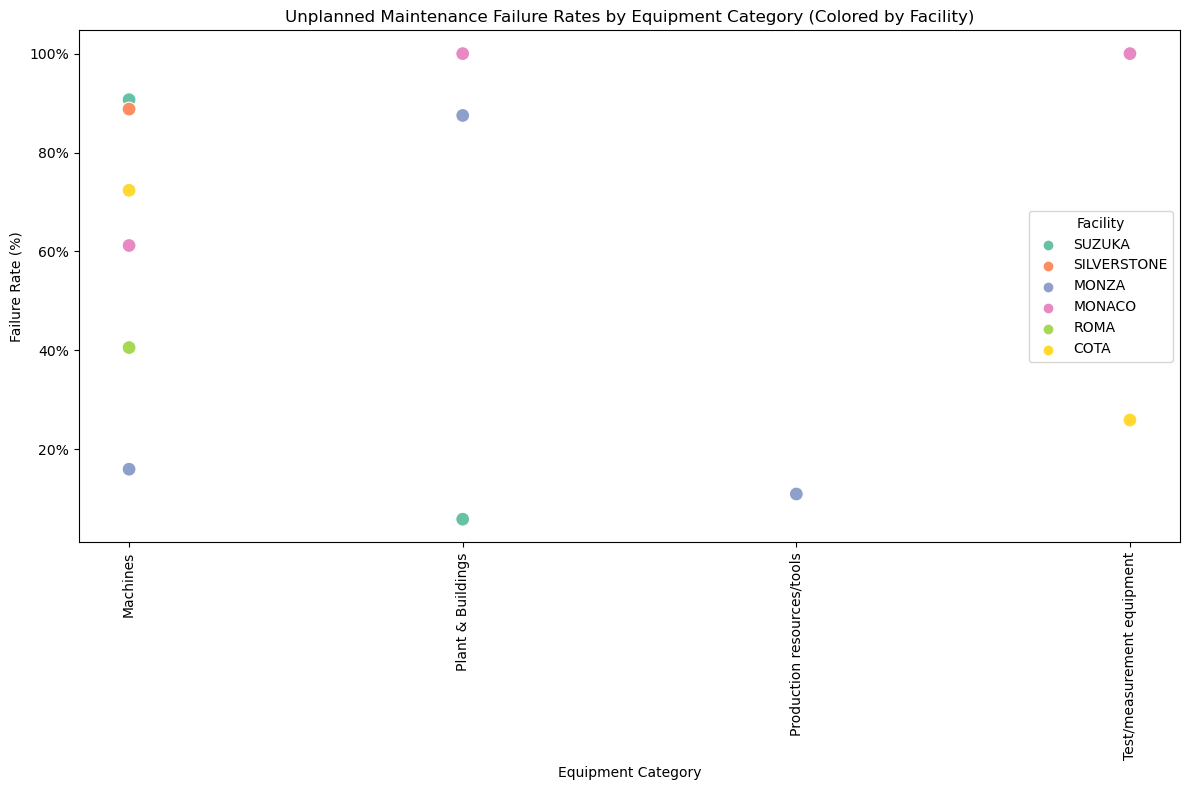

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Unique values in Maintenance Activities:
df['MAINTENANCE_ACTIVITY_TYPE'].value_counts()

# Filter for unplanned maintenance
unplanned_df = df[df['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned']

# Group by EQUIP_CAT_DESC, PLANT_ID, and PRODUCTION_LOCATION to retain facility and plant info
equipment_failures = unplanned_df.groupby(['EQUIP_CAT_DESC', 'PLANT_ID', 'PRODUCTION_LOCATION']).size().reset_index(name='Unplanned_Failures')

# Total maintenance activities by equipment category, plant, and facility
total_maintenance = df.groupby(['EQUIP_CAT_DESC', 'PLANT_ID', 'PRODUCTION_LOCATION']).size().reset_index(name='Total_Maintenance')

# Merge the two DataFrames to calculate failure rates
failure_rates = pd.merge(equipment_failures, total_maintenance, on=['EQUIP_CAT_DESC', 'PLANT_ID', 'PRODUCTION_LOCATION'])

# Calculate the failure rate
failure_rates['Failure_Rate'] = failure_rates['Unplanned_Failures'] / failure_rates['Total_Maintenance']

# Ensure equipment category descriptions are strings for proper labeling
failure_rates['EQUIP_CAT_DESC'] = failure_rates['EQUIP_CAT_DESC'].astype(str)

# --- First Plot: Failure Rate by Equipment Category ---

plt.figure(figsize=(12,8))

# Use seaborn scatterplot and color by facility (PRODUCTION_LOCATION)
sns.scatterplot(data=failure_rates, x='EQUIP_CAT_DESC', y='Failure_Rate', hue='PRODUCTION_LOCATION', palette='Set2', s=100)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Unplanned Maintenance Failure Rates by Equipment Category (Colored by Facility)')
plt.xlabel('Equipment Category')
plt.ylabel('Failure Rate (%)')

# Add percentage labels to the Y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

# Add a legend for the facilities
plt.legend(title="Facility")

# Ensure everything fits nicely
plt.tight_layout()
plt.show()


## Question 2
### Explore is whether older machines are more likely to experience unplanned maintenance

C:\Users\mckay\AppData\Local\Temp\ipykernel_2332\779147843.py:7: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


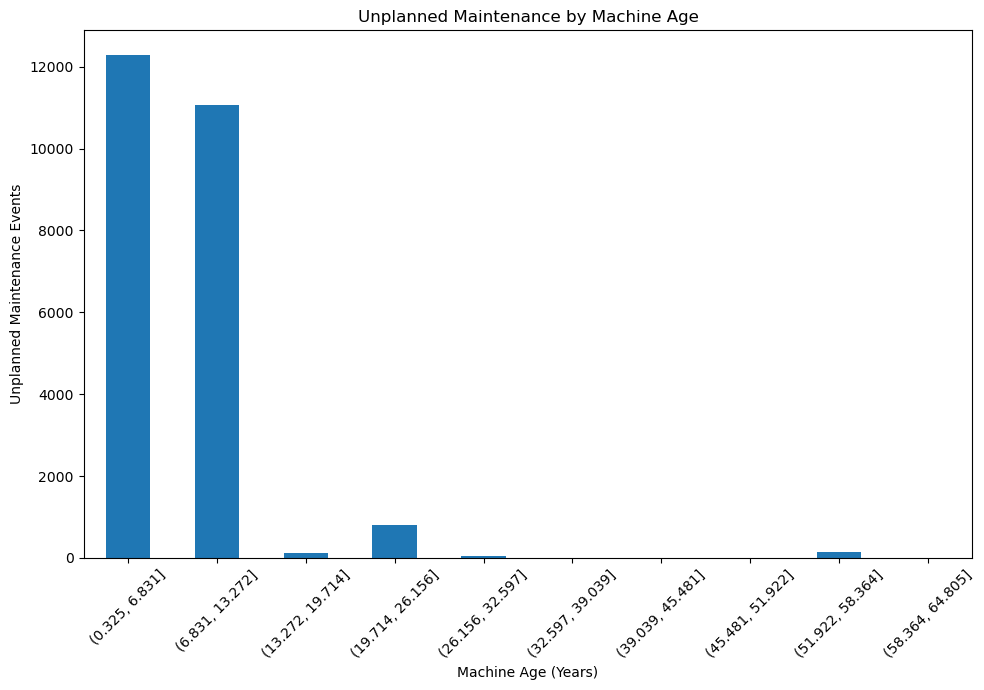

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load data
file_path = 'IWC_Work_Orders_Extract.csv'
df = pd.read_csv(file_path)

# Convert to datetime and calculate machine age in years
df['EQUIP_START_UP_DATE'] = pd.to_datetime(df['EQUIP_START_UP_DATE'], errors='coerce')
df['MACHINE_AGE_YEARS'] = (datetime.now() - df['EQUIP_START_UP_DATE']).dt.days / 365

# Filter unplanned maintenance and group by machine age bins
unplanned = df[df['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned']
age_bins = pd.cut(unplanned['MACHINE_AGE_YEARS'], bins=10)
unplanned_by_age = unplanned.groupby(age_bins).size()

# Plot the data
unplanned_by_age.plot(kind='bar', figsize=(10, 7))
plt.title('Unplanned Maintenance by Machine Age')
plt.xlabel('Machine Age (Years)')
plt.ylabel('Unplanned Maintenance Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 3
### explore whether certain plant IDs are more prone to unplanned maintenance activities

C:\Users\mckay\AppData\Local\Temp\ipykernel_2332\2938217720.py:6: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('IWC_Work_Orders_Extract.csv')


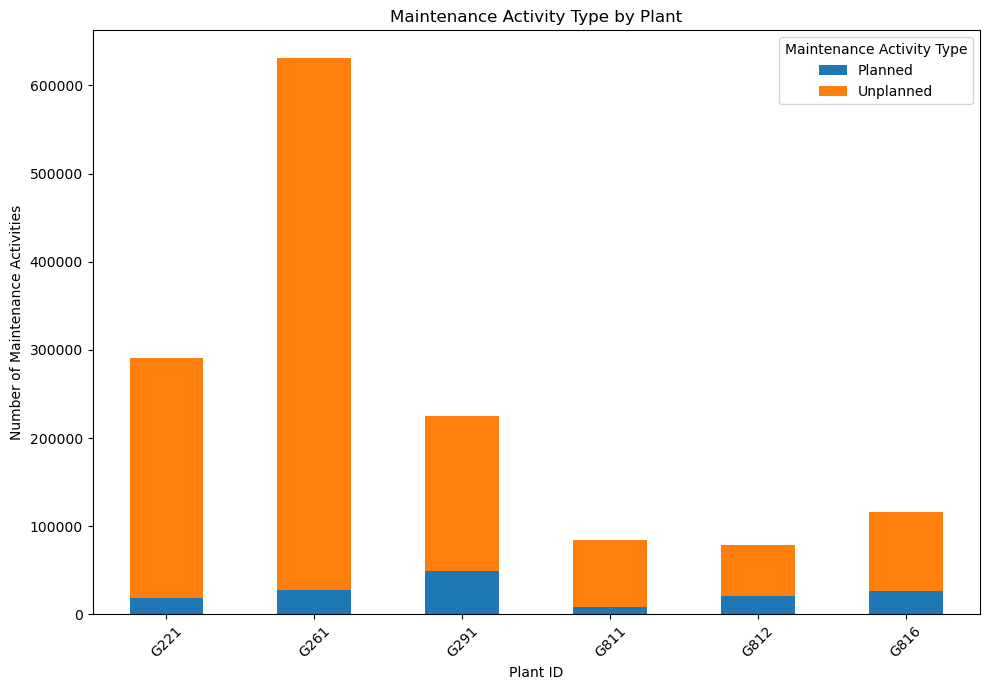

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('IWC_Work_Orders_Extract.csv')

# Drop rows with missing values in relevant columns, if any
df = df.dropna(subset=['MAINTENANCE_ACTIVITY_TYPE', 'PLANT_ID'])

# Group by PLANT_ID and MAINTENANCE_ACTIVITY_TYPE and count occurrences
maintenance_count = df.groupby(['PLANT_ID', 'MAINTENANCE_ACTIVITY_TYPE']).size().unstack()

# Plot the grouped data
maintenance_count.plot(kind='bar', stacked=True, figsize=(10, 7))

# Labeling the axes and chart
plt.title('Maintenance Activity Type by Plant')
plt.xlabel('Plant ID')
plt.ylabel('Number of Maintenance Activities')
plt.xticks(rotation=45)
plt.legend(title='Maintenance Activity Type')
plt.tight_layout()

# Show the plot
plt.show()


## Results <a id="Results"></a>


### Question 1 Results 

When reviewing the visualization from question one, one data point stands out. As we determined in question three, Silverstone has the largest percentage difference between planned and unplanned maintenance, making it a key area to focus on. In this visualization, we see that failures in the machine equipment category at Silverstone occur about 90% of the time. This could be an excellent area to concentrate on, as this category is specific enough for a model to be tailored to this particular subset of data.

### Question 2 results 

When examining unplanned maintenance by machine age, an interesting trend emerges. It appears that the youngest machines, from 0.3 to 6 years old, experience the most unplanned maintenance events, while older machines, ranging from 6 to 13 years, tend to have fewer.

Several factors could explain this, such as the majority of machines being newer or perhaps that new machines haven’t yet established the necessary planned maintenance protocols, whereas older machines already follow regular maintenance schedules.

Nevertheless, it seems that focusing on younger machines may not be useful for developing a predictive maintenance model.

### Question 3 results 

The results of this analysis are fairly straightforward: Plant G261 (Silver Stone) has, by far, the highest number of unplanned maintenance activities and the largest percentage disparity between planned and unplanned maintenance. This suggests that, when developing our models in the next step, we should focus specifically on the issues occurring at Silver Stone.

By tailoring the model to one plant, it would need to be less flexible, potentially making it more accurate for predicting future unplanned maintenance events.

### Conclusion 

In this EDA, we’ve uncovered several important insights about the data and its relationships. Contrary to initial assumptions, older machines don’t necessarily fail more often due to their age. In fact, younger machines, particularly those under six years old, tend to have more unplanned maintenance events. We also identified Silverstone as a particularly problematic plant, with failure rates in the machine equipment category reaching as high as 90%. These findings highlight Silverstone, especially its machine category, as a key focus area. Based on these insights, we can target the machine category at Silverstone as a potential area for developing predictive models to reduce unplanned maintenance and improve operational efficiency.